<a href="https://colab.research.google.com/github/Allam0053/belajarmldicoding/blob/master/Belajar_Machine_Learning_untuk_Pemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Arif Faizin

Email : muhammadariffaizin@gmail.com

## **Import library dan get resource dari server**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-18 15:30:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  25.3MB/s    in 13s     

2020-10-18 15:30:26 (24.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## **Extract resource dan splitting dataset**

In [ ]:
# ekstrak file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [ ]:
base_dir = '/tmp/rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(test_dir)

train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

os.mkdir(train_rock_dir)
os.mkdir(train_paper_dir)
os.mkdir(train_scissors_dir)

test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')

os.mkdir(test_rock_dir)
os.mkdir(test_paper_dir)
os.mkdir(test_scissors_dir)

In [ ]:
# splitting dataset
train_rock_data, test_rock_data = train_test_split(os.listdir(rock_dir), test_size=.4)
train_paper_data, test_paper_data = train_test_split(os.listdir(paper_dir), test_size=.4)
train_scissors_data, test_scissors_data = train_test_split(os.listdir(scissors_dir), test_size=.4)

## **Mengelompokkan data**

In [ ]:
import shutil

for file in train_rock_data:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock_dir, file))
for file in train_paper_data:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper_dir,file))
for file in train_scissors_data:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors_dir,file))

for file in test_rock_data:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(test_rock_dir,file))
for file in test_paper_data:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(test_paper_dir,file))
for file in test_scissors_data:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(test_scissors_dir,file))

## **Generate gambar**

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,               # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,                # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## **Training**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
# Fungsi kontrol Callback untuk mencegah overfit dan hentikan training setelah akurasi terpenuhi
class callbackClass(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi di atas 96%, hentikan training!")
      self.model.stop_training = True

stop_callbacks = callbackClass()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 35, # dataset minimal = steps_per_epoch * epoch
    epochs = 25,          # dataset minimal = 35 * 25 = 875 < 876 (minimal data dari jumlah test)
    validation_data = test_generator,
    validation_steps = 25, 
    verbose =2,
    callbacks=[stop_callbacks]
)

Epoch 1/25
35/35 - 66s - loss: 1.1145 - accuracy: 0.4777 - val_loss: 0.7882 - val_accuracy: 0.7237
Epoch 2/25
35/35 - 66s - loss: 0.6020 - accuracy: 0.7723 - val_loss: 0.3933 - val_accuracy: 0.8838
Epoch 3/25
35/35 - 65s - loss: 0.3268 - accuracy: 0.8938 - val_loss: 0.2793 - val_accuracy: 0.9100
Epoch 4/25
35/35 - 65s - loss: 0.2258 - accuracy: 0.9152 - val_loss: 0.2238 - val_accuracy: 0.9162
Epoch 5/25
35/35 - 65s - loss: 0.1997 - accuracy: 0.9286 - val_loss: 0.1439 - val_accuracy: 0.9488
Epoch 6/25
35/35 - 65s - loss: 0.1587 - accuracy: 0.9446 - val_loss: 0.1417 - val_accuracy: 0.9563
Epoch 7/25
35/35 - 65s - loss: 0.1466 - accuracy: 0.9518 - val_loss: 0.1320 - val_accuracy: 0.9675
Epoch 8/25
35/35 - 65s - loss: 0.1059 - accuracy: 0.9571 - val_loss: 0.1591 - val_accuracy: 0.9463
Epoch 9/25

Akurasi di atas 96%, hentikan training!
35/35 - 65s - loss: 0.1250 - accuracy: 0.9607 - val_loss: 0.1403 - val_accuracy: 0.9525


## **Hasil akurasi training model**

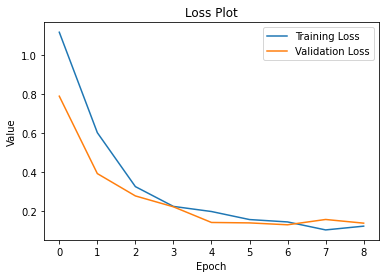

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

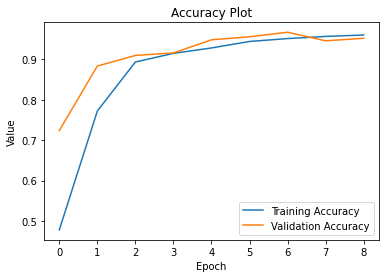

In [ ]:

#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

## **Testing**

Saving testdata.png to testdata.png
testdata.png
scissors


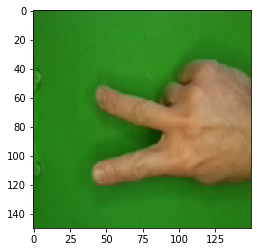

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')